# Data Exploration & Data Visualisation using R

In [1]:
# load dataframe
load("greensand.RData")

#Check what dataframes have loaded
ls()

[1] "greensand"

In [2]:
# check structure of dataframe loaded
str(greensand)

'data.frame':	4186 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...


The file **greensand.RData** was obtained from a University website.

The following gives a data dictionary for the dataframe `greensand`.

The columns in `greensand` are as follows:

* `legTime` - the time taken by the runner (in minutes), given in a decimal format: i.e. 30.75 corresponds to 30 minutes and 45 seconds. This will be the response variable.
* `year` - the year in which the race was run.
* `id` - a unique number indicating the runner (which remains the same if a runner takes part in two or more years)
* `gender` - the declared gender for the runner, taking the value M for male and F for female
* `ageClass` - the declared age class for the runner 
* `age` - the estimated age (in years) of the runner on the day of the race, which is based on the declared age class for the runner in each year they have taken part (a reasonable estimate is not possible for all runners)
* `leg` - the leg number that the runner had in the race, taking the values 1, 2, 3, 4, 5 or 6
* `legLen` - the length (in miles) of the leg 
* `mpm` - the speed of the runner (in minutes per mile)

## Client's objectives

The question that has been posed, is to find a model that represents the performance of runners in previous years. Then to use these predictions to generate new handicap times for each leg of the Greensand Relay race, to help make them fairer for more diverse runners. 

So intuitively we are looking to use this data to predict how much time it will take on average for a runner to complete a leg of the race, depending on the applicable explanatory variables (such as age, gender etc.)

The most obvious response variables are therefore `legTime` and `mpm`, as the former can be used to predict how long it will take to complete a leg. The latter can be used predict the average speed of a type of runner, of which we can then use to calculate a fair leg time by multiplying it by the leg mileage.

As the variables `legTime` and `mpm` are the dependent variables in this case, then either should not be fit as an explanatory variable.

In [4]:
# Make the vectors (variables) in the data frame directly accessible to R 
#this will save having to type dataframe$variable ad nauseum later
attach(greensand)

# Check the dataframe has loaded OK
head(greensand)
tail(greensand)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
1988,1001,M,40,44.5,1,5.75,43.48,7.56
1988,1002,M,20,18.5,2,3.67,31.27,8.52
1988,1003,M,50,51.0,3,7.74,59.52,7.69
1988,1004,M,50,54.5,4,4.10,42.77,10.43
1988,1005,M,21,33.0,5,7.58,65.95,8.70
1988,1006,F,21,34.0,6,3.18,29.88,9.40


,year,id,gender,ageClass,age,leg,legLen,legTime,mpm
4181,2019,32271,F,45,49.5,1,5.54,60.78,10.97
4182,2019,30205,F,45,50.5,2,4.05,43.73,10.80
4183,2019,30203,M,50,51.0,3,9.10,84.28,9.26
4184,2019,31209,F,45,50.0,4,5.84,54.70,9.37
4185,2019,32275,F,35,39.5,5,5.28,66.97,12.68
4186,2019,32276,F,55,59.5,6,4.68,60.33,12.89


#### Visual summary of response variables `legTime` and `mpm`

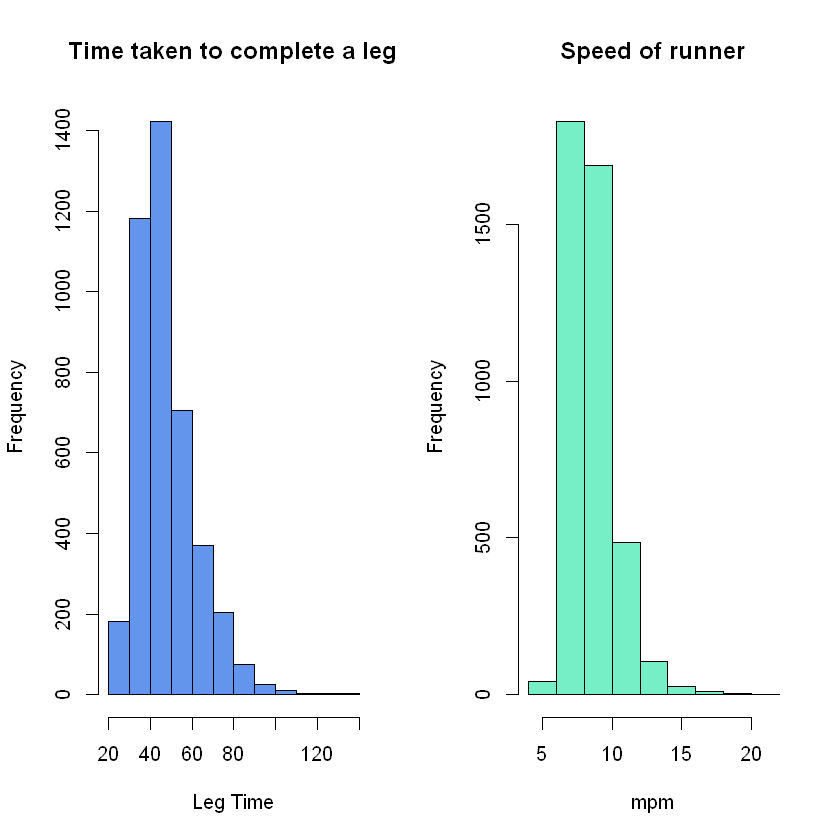

In [4]:
#create hist of responses
par(mfrow=c(1,2))

hist(legTime,
     main="Time taken to complete a leg",
     xlab="Leg Time",
     col="cornflowerblue",
     breaks = 10)

hist(mpm,
     main="Speed of runner",
     xlab="mpm",
     col="aquamarine2",
     breaks = 10)

##### Leg time histogram comments

The peak is around a time of 45 minutes. The range appears to be from 20 to 140 minutes. There are no obvious outliers shown in the histogram (gaps in the histogram). 

It is right skewed. The distribution extends further into the higher times of `legTime`. This tells me the mean will be affected more than the median with both values being pulled upwards in magnitude.

##### MPM histogram comments

The peak is around 7 minutes per mile. The average running speed of a person who is in shape is about 9 to 10 mins and the average running time for new runners is about 12 to 15 mins (source healthline website). So it appears we have the majority of people running fairly competitively. (The world record time for running a mile is 3 min 43 seconds).

The range is not clear from the histogram but the majority of speeds are from 5 to 20 minutes per mile. It is worth noting 20 mins per mile calculates to about 3 mph which is the average walking speed of a person. So some runners have chosen to walk instead which is not unlikely in races. So these times look reasonable. There are no obvious outliers shown in the histogram. 

It is right skewed. The distribution extends further into the slower speeds of `mpm`. This tells me the mean will be affected more than the median, with both values being pulled upwards in magnitude. (Taking more time to complete a mile)

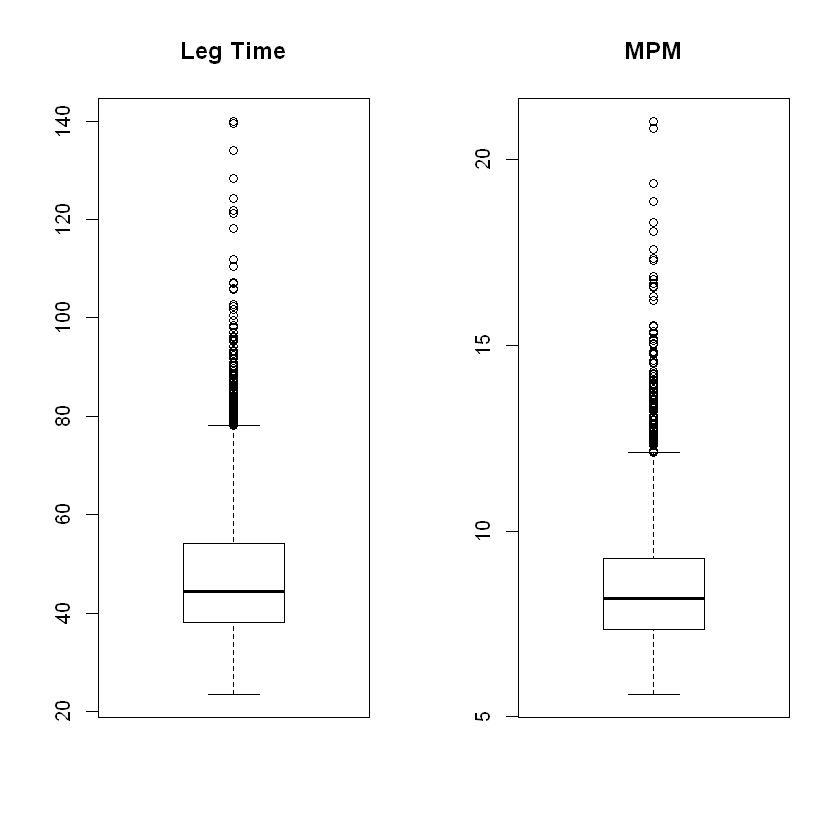

In [5]:
#create boxplots of responses

par(mfrow=c(1,2))

boxplot(legTime, main = "Leg Time")
boxplot(mpm, main = "MPM")

##### Leg Time box plot comments

The box-plot shows us the median time is about 45 minutes. The range of the times appears to be from 25 to 140 minutes. The IQR appears to be from about 39 to 53 minutes. 

The box-plot also indicates the data is right skew. Again meaning the mean will be more affected than the median in magnitude (pulled up in value).

The boxplot also indicates there are many potential outliers with very high times above 79 minutes. There may be some investigation needed into these values.

##### MPM  box plot comments

The box-plot shows that the median speed is roughly about 8 minutes per mile. The range of the speeds appears to be from about 6 to 22 minutes per mile. The IQR appears to be from roughly about 7 to 9 minutes per mile. So about 75% of runners are running competitively.

The box-plot also indicates the data is right skew. Again meaning the mean will be more affected than the median in magnitude (pulled up in time taken).

The box plot also indicates there are many potential outliers with very slow speeds above 12 minutes per mile. There may be some investigation needed into these values. However it could be that some runners decided to walk/jog instead of run competitively and the organisers want this to be included in the model. The average moderate walking speed of a reasonably healthy person is about 15 to 20 minutes per mile (source: British Heart Foundation website).

#### Visual summary of covariates `age` & `legLen`

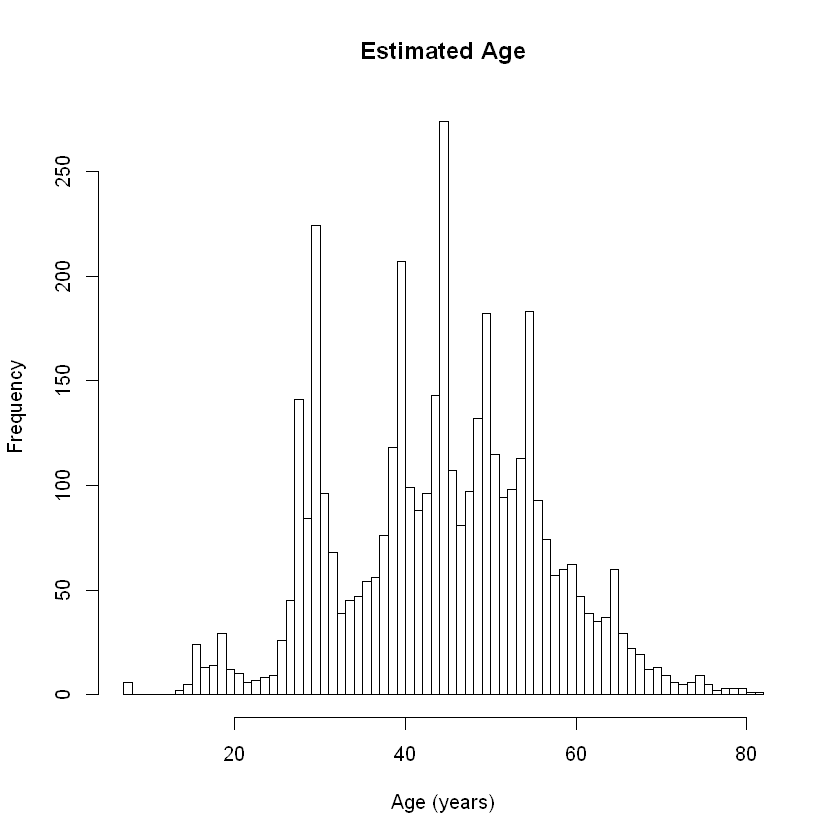

In [6]:
#create hist of covariate age

hist(age,
     main="Estimated Age",
     xlab="Age (years)",
     breaks = 60)

##### Age histogram comments

We can see the data is not normally distributed. The distribution appears to be multi modal with the biggest peak around 44.5 years of age, the second largest peak at 29.5 years and the third largest at 39.5 years.  The range is not clear from the histogram but the majority of runners are from the the ages of 20 to 80 years old. There is a possible outlier on the lowest extreme values (gap in the histogram). Some investigation will be needed in this value.

The data appears to be symmetrical around the modes and there are tails on both the extreme lowest and highest values. It will be interesting to see if the mean and median are similar or not in the non-visual summary.

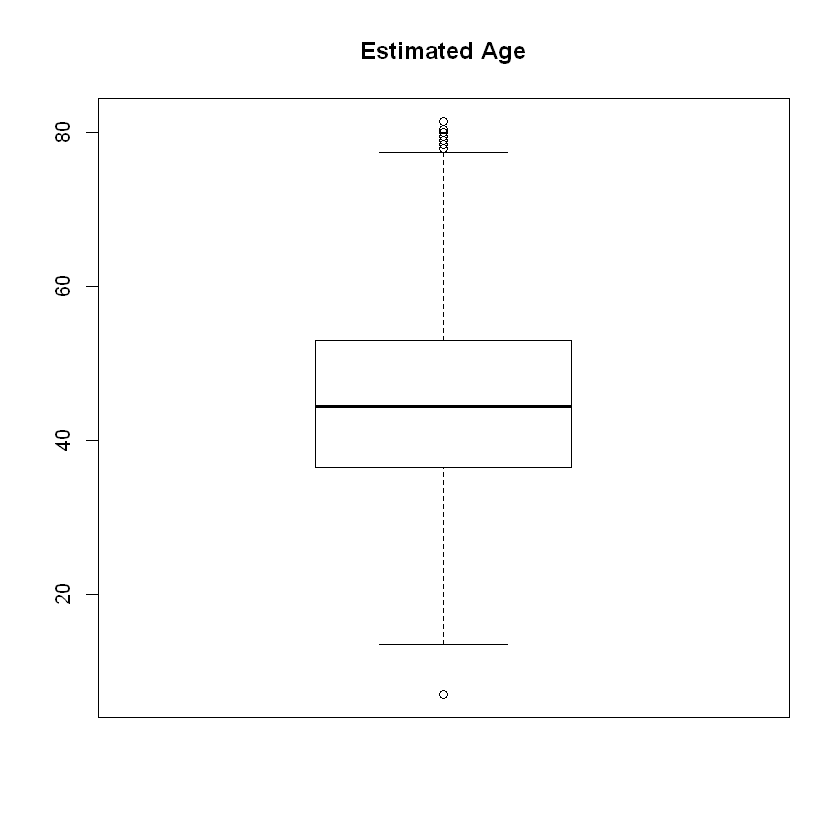

In [7]:
boxplot(age, main = "Estimated Age")

##### Age box plot comments

The box plot shows us the median is about 45 years of age. The range of ages appears to be from 10 to 78 years of age. The IQR looks to be from about 35 to 55 years of age.

Here the data appears to be symmetrical. And there are outliers present at the highest and lowest values.

In [8]:
# create a non-visual sumary on covariate age
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   7.00   36.50   44.50   44.53   53.00   81.50     101 

##### Age numerical summary comments

The median and the mean are similar which tells me the data is symmetric, as the distribution is multi modal. 

The youngest person to run was 7 years of age and the eldest was 81.5 years of age. This makes the overall length of the distribution to be 74.5 years.

The IQR is 16.5 years.

There are 101 data entries marked as N/A which means there are 101 ages missing. It was advised by the race organiser that a reasonable estimate was not possible for all runners

In [9]:
# code to check if missing values for any other variables
cat("Missing values by variable")
colSums(is.na(greensand))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0      101        0        0        0 
     mpm 
       0

In [5]:
#create dataframe without missing values
greensandNoNA  <- na.omit(greensand)

In [6]:
str(greensandNoNA)

'data.frame':	4085 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...
 - attr(*, "na.action")= 'omit' Named int  21 55 114 155 162 215 231 294 300 364 ...
  ..- attr(*, "names")= chr  "21" "55" "114" "155" ...


In [12]:
# code to check if missing values for any variables in new dataframe
cat("Missing values by variable")
colSums(is.na(greensandNoNA))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0        0        0        0        0 
     mpm 
       0

##### Outliers in age

The possibility of an 81.5 year old in a race seems plausible however I want to take a closer look at the bottom extreme outliers as they did not seem connected to the data in the histogram.

In [13]:
# code to look for extreme low outliers
greensandNoNA[greensandNoNA$age <="14",]
greensandNoNA[greensandNoNA$age <="13",]
greensandNoNA[greensandNoNA$age <="12",]
greensandNoNA[greensandNoNA$age <="11",]
greensandNoNA[greensandNoNA$age <="10",]
greensandNoNA[greensandNoNA$age =="9",]
greensandNoNA[greensandNoNA$age =="8",]
greensandNoNA[greensandNoNA$age =="7",]

,year,id,gender,ageClass,age,leg,legLen,legTime,mpm
145,1991,4025,M,14,13.5,1,4.68,36.67,7.84
3624,2017,30242,M,14,14.0,2,4.05,29.70,7.33


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


,year,id,gender,ageClass,age,leg,legLen,legTime,mpm
265,1993,6043,M,14,7,1,4.68,50.87,10.87
437,1995,8035,F,14,7,5,4.18,37.60,9.00
703,1998,11019,F,14,7,1,4.68,44.95,9.60
704,1998,11020,F,14,7,2,5.28,56.30,10.66
1919,2010,23164,M,14,7,2,4.05,43.62,10.77
3180,2016,29060,M,14,7,6,4.68,32.25,6.89


It appears there is a jump between 13.5 years of age and seven years old.

We have data for six runners aged seven years old. The speeds for five of them are all about the same. However one of them has a seven year old running at 8.7 mph which appears to be an outlier. 

Another thing to note is all of the leg lengths they ran are over 1.5 miles, however the recommended maximum running distance for a child under 9 is 1.5 miles. (source: nationwidechildrens.org/specialties/sports-medicine/sports-medicine-articles/tips-for-new-runners-how-much-is-too-much)

So it might be worth running the model with and without these data entries.

For now I'll make a note of the observation numbers 265, 437, 703, 704, 1919 & 3180 

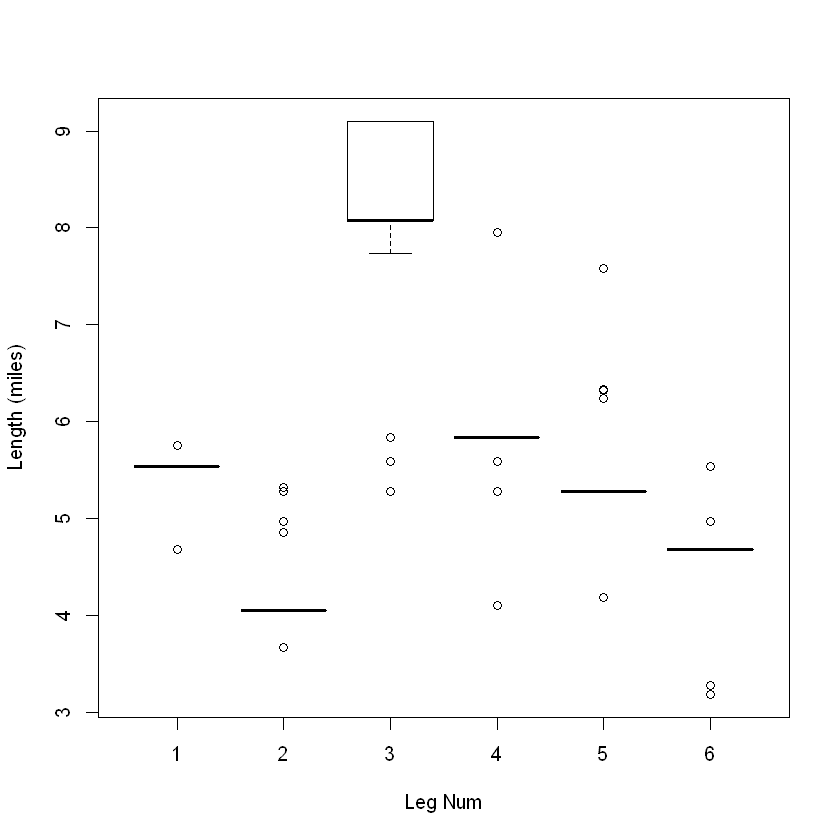

In [14]:
#create comparitive boxplot of leg length
plot(legLen ~ leg, xlab="Leg Num", ylab="Length (miles)")

Overall the legs varied in distance between roughly 3 miles are 9 miles which is also what what advised by the race organiser. 

The only leg which has a box and whisker is leg 3. This is the only leg which shows any variance. The remaining legs show very little variance in their length.

Leg 2 is the shortest leg with a median of 4 miles with the next shortest leg as leg 6 at roughly about 4.5 miles.
Legs 4, 5 & 6 are very roughly about the same length at around the 5.5 mile mark.

Leg 3 is the longest leg with a median of about 8 miles. It has no top whisker just a box meaning the largest 25% of values are all the same value of roughly 9 miles. And a further 25% of its data values are between 8 and 9 miles in length. Meaning 50% of its values are 8 to 9 miles in length.

Leg 3 has no bottom box meaning 25% of its values are the median at roughly 8 miles in length. And a further 25% of it's lowest values which is indicated by the bottom whisker vary from the 7.75 to the 8 mile mark. Meaning the remaining 50% of the data values are from 7.75 to 8 miles in length.

Leg 3 is asymmetric but it is not clearly left or right skew.

There are some outliers on all of the legs, which show some years the length of the legs changed.

We can also see that `leg` and `legLen` are not independent variables. As `leg` changes so does `legLen` and thus to avoid multicollinearity we should use one variable or another but not both.

#### Visual summary of factors

I will keep year as a factor. My reasoning is we're interested in the mean response for the year and if we look closely at the regression function for the response, if we were to class `year` as a covariate it would create a regression co-efficient to multiply the variable by a certain amount.

We know the variable `year` will always increase by one and if the regression co-efficient is positive it will increase the response by a factor of it's magnitude every year. However if it were to be negative it would decrease the response by a factor of it's magnitude for every year.

Basically in this context it would mean that when we increase the year to predict leg time for future it will increase/decrease the leg time by it's regression co-efficients steadily. 

The request is to create a model that represents the performance of the runners in previous years. So instead of having a steady increase/decrease we should actually be looking at the mean response of that year which is what a factor does.

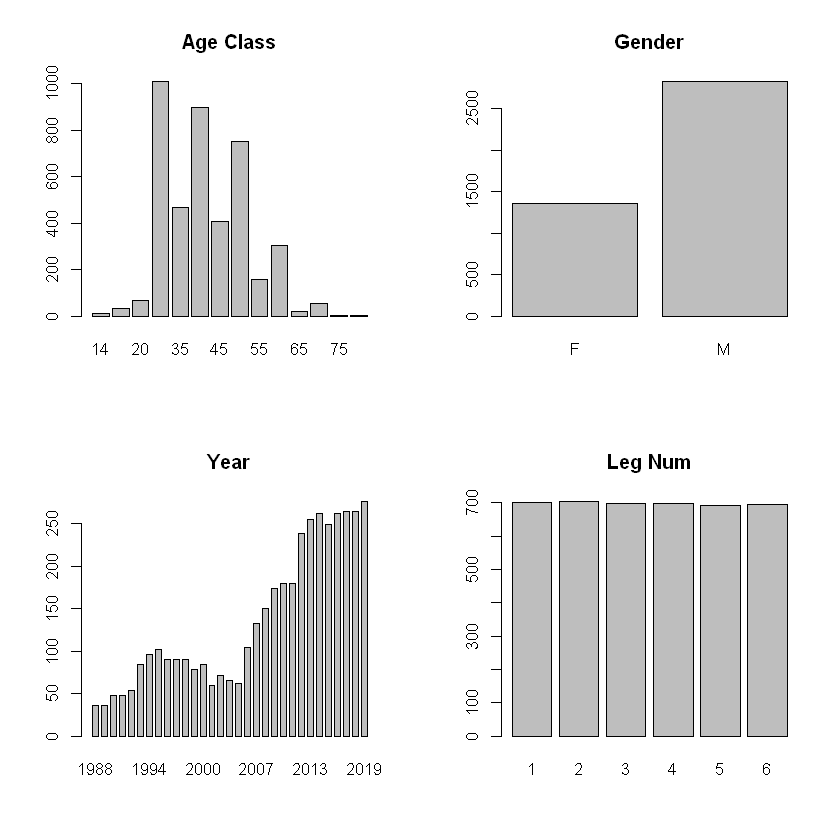

In [15]:
# create visual summaries of factors
par(mfrow = c(2,2))

plot(ageClass, main = "Age Class")
plot(gender, main = "Gender")
plot(year, main = "Year", space=0.5)
plot(leg, main = "Leg Num")

##### Age class bar chart comments

This bar chart shows the factor `ageClass` has the highest proportion of runners in level 21 with about 1000 runners. 
It is worth noting that levels 14, 16, 20 and 21 all contain both male and female runners. 

Whereas levels 35, 45, 55, 65 & 75 contain only female runners. And levels 40, 50, 60, 70 & 80 only contain male runners. This explains why after level 21 the next two levels with the highest proportions are level 40 with about 900 runners, level 50 with about 750 runners. This is in agreement with the factor `gender` where we saw there were twice as many man as women participating in the race overall.

After the top 3 levels mentioned before the next level with the 4th highest proportion is level 35 (women only) with about 450 runners and then level 45 (women only) with about 400 runners. So the age of the runners is also not equally proportioned with about 3500 out of the 4186 data entries being located in the five levels 21, 35, 40, 45 & 55.

So over 80% of data entries lie in 5 out of 14 of the levels for this factor. This may affect the model if the fitted model is based on this training data set as it may give incorrect predictions if the test data set were predominantly outside of these 5 levels. 

However this might also be the most preferred (and intuitively more likely) ages for people to participate in a race, so it may in fact be the preferred data set we need to make good predictions.

It would be better if we had equal proportions in each level for a factor but in a real world scenario this is the most likely ages people will take part in a race, but it is worth noting when doing predictions.

##### Gender comments

This bar chart shows the factor `gender` is as we'd expect to be binary data with the value M for male and the value F for female. 

We can see that out of the data collected there are over twice as many men in this data set compared to women. This may affect the model if the fitted model is based on this training data set as it may give incorrect predictions of the test data set were inversely proportioned with women (if the test data set had twice as many women as men). This would be worth mentioning to the organisers if they meant more 'diverse' runners were to be female runners instead of participants who choose to walk. So clarification of this would be a good idea with the organisers.

It would be better if we had equal proportions in each level for a factor for the model, but real world data is rarely perfect.

##### Year comments

We can see the popularity of the run has increased at least six fold in the last 31 years. (Note: we only have 30 years of data as the race was cancelled in 2001 due to a foot & mouth crisis)

The first two years it was held there were about 40 runners. In the least year it was held there were over 250.

It had an initial peak in 1995 with about 100 runners taking part, which then started to remain steady, then slowly decline to about 50 runners in 2002 (the year after foot and mouth cancelled the run). where it remained pretty even until 2005.

In 2006 the number of runners doubled to 100 runners in attendance and then started to increase in popularity each year until 2019 where over 250 runners were in attendance. 

It is worth noting the next year (2020) the race was cancelled again due to coronavirus.

##### Leg comments

In the bar chart we can see the factor `leg` is pretty uniformly distributed between the six levels. This is to be expected really as all 6 legs need to be run by a team to complete the race. So it would be odd if one of the levels had a significantly higher proportion in it. It gives us confidence that the data has been collected for this variable sucessfully. Meaning a model using these data values will give us a fairly decent prediction of times for these six levels if used in the training data set.

In [7]:
# create a dataframe without `mpm` & `id` variables
dataframe1 <- data.frame(year, gender, ageClass, age, leg, legLen, legTime)

# check dataframe has created OK
str(dataframe1)

'data.frame':	4186 obs. of  7 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...


In [8]:
# detach greensand data frame from R to remove possibility for errors
detach(greensand)

In [8]:
#attach new dataframe
attach(dataframe1)

In [9]:
#Check dataframe
head(dataframe1)
tail(dataframe1)

year,gender,ageClass,age,leg,legLen,legTime
1988,M,40,44.5,1,5.75,43.48
1988,M,20,18.5,2,3.67,31.27
1988,M,50,51.0,3,7.74,59.52
1988,M,50,54.5,4,4.10,42.77
1988,M,21,33.0,5,7.58,65.95
1988,F,21,34.0,6,3.18,29.88


,year,gender,ageClass,age,leg,legLen,legTime
4181,2019,F,45,49.5,1,5.54,60.78
4182,2019,F,45,50.5,2,4.05,43.73
4183,2019,M,50,51.0,3,9.10,84.28
4184,2019,F,45,50.0,4,5.84,54.70
4185,2019,F,35,39.5,5,5.28,66.97
4186,2019,F,55,59.5,6,4.68,60.33


### Relationship between response and covariates

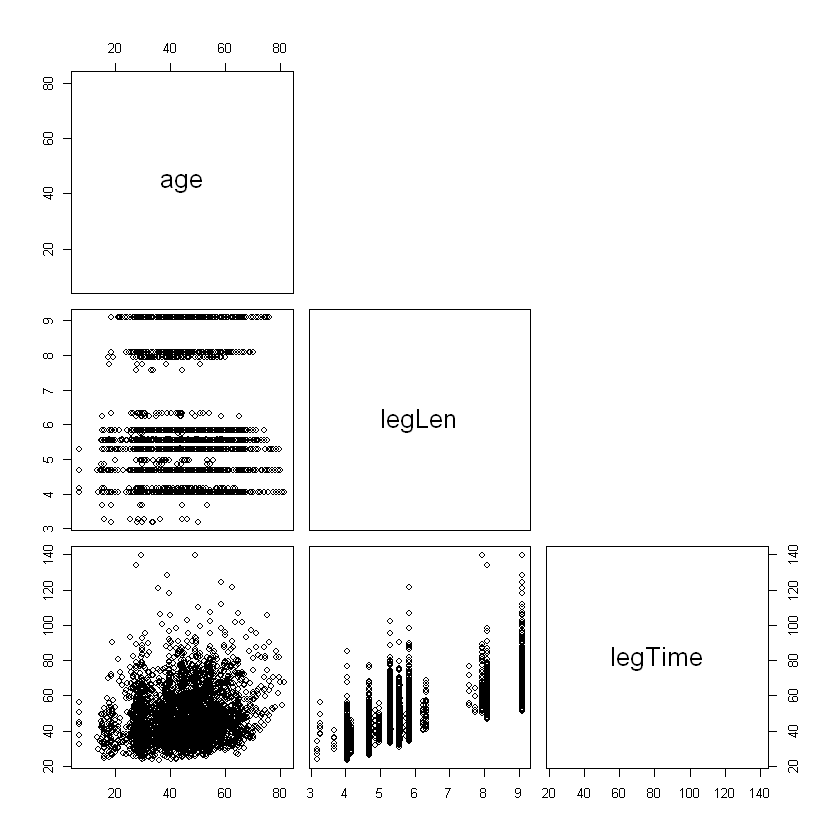

In [21]:
# create a scatterplot matrix for the covariates
scatMatrix <- dataframe1[,c('age', 'legLen', 'legTime')]
pairs(scatMatrix, , upper.panel = NULL)

##### Relationship between `LegTime` and `legLen`

Here we can see a positive linear relationship between the leg time and the length of the length. Intuitively the leg time increases as the length of the leg increases. I wouldn't say it was a strong relationship as there is quite a bot of scatter about the imaginary trend line, mostly in the higher leg times. 

However it is much clearer that there are some outliers present (in the higher values) 

It appears that variation is not constant here suggesting a transformation of the response might be required.

##### Relationship between `LegTime` and `age`

There is a hint of very weak positive relationship between `age` and `legTime` but there is a lot of scatter in this graph so it is hard to distinguish outliers.

Where the points are close to each other it does appear to be going upwards indicated by the dark mass, which is what you would expect intuitively but from this graph it is not very clear.

The variation also seems to be increasing with age but again not overtly clear in this graph. This means the constant variance assumption may be in doubt and a transformation of the response may be needed.

It could well be being obscured by the mix of women and men so I will separate them out by gender to see if this is clearer.

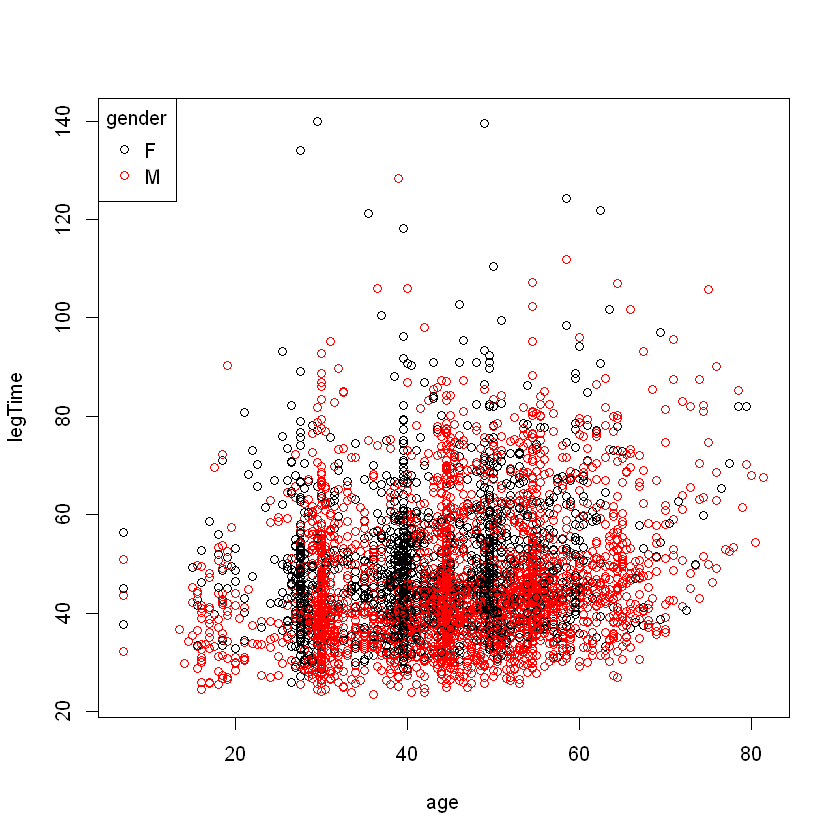

In [22]:
# code to distinguish by gender
plot(age, legTime, col=as.numeric(gender))

legend("topleft", title="gender", legend=levels(gender), pch=1, 
       col = seq_along(levels(gender)))

Here I can see better that there appears to be a weak positive linear relationship between `age` and `legTime`. Particularly for women but its not so obvious for men in this plot. It does seem to curve slightly so a transformation of the explanatory might be reasonable to enhance linearity.

Its not entirely clear due to the large number of data points and the possibly curvature, however it does not appear that the variation is not very consistent.

There do appear to be outliers at the top ends of the data values.

I will try plotting the mean of the response `legTime` against the variable `age` to see if this clears it up.

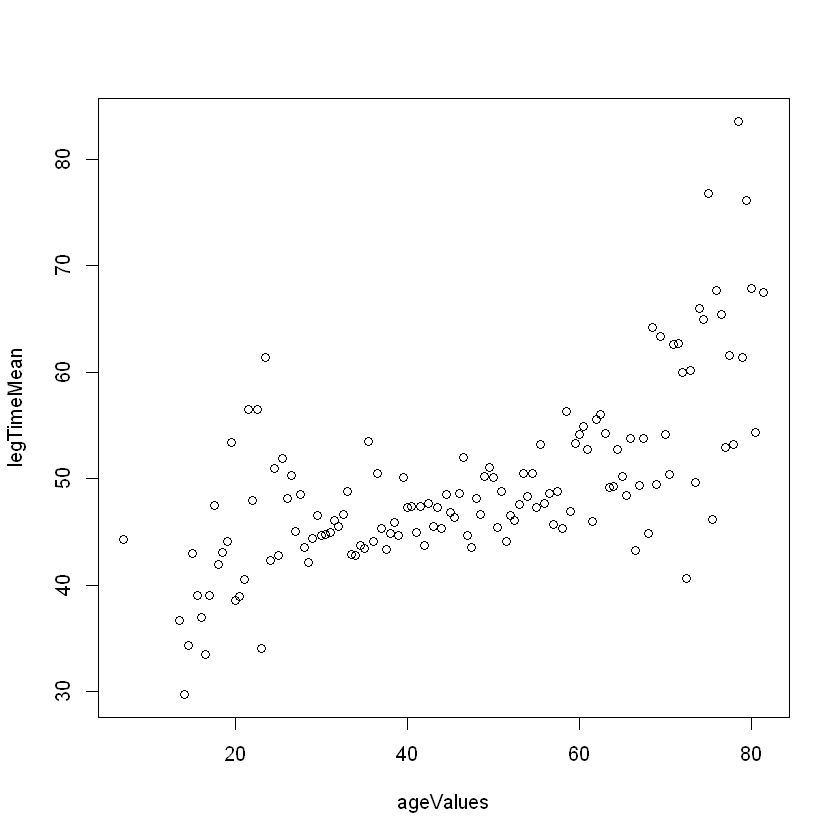

In [23]:
# plot mean of response against age
legTimeAggregate <- aggregate(legTime, list(age), mean)
ageValues <- legTimeAggregate[,1]
legTimeMean <- legTimeAggregate[,2]
plot(ageValues, legTimeMean)

Plotting the means of the response means we have lost the sense of variability, however we can see what appears to be a linear relationship between the variable `age` and leg time. Its not a strong linear relationship as we have quite a bit of scatter, mostly at the top and bottom values of the covariate.

But between the ages of 30 and 70 we appear to have a fairly strong linear relationship between the variables.

### Relationship between response and factors

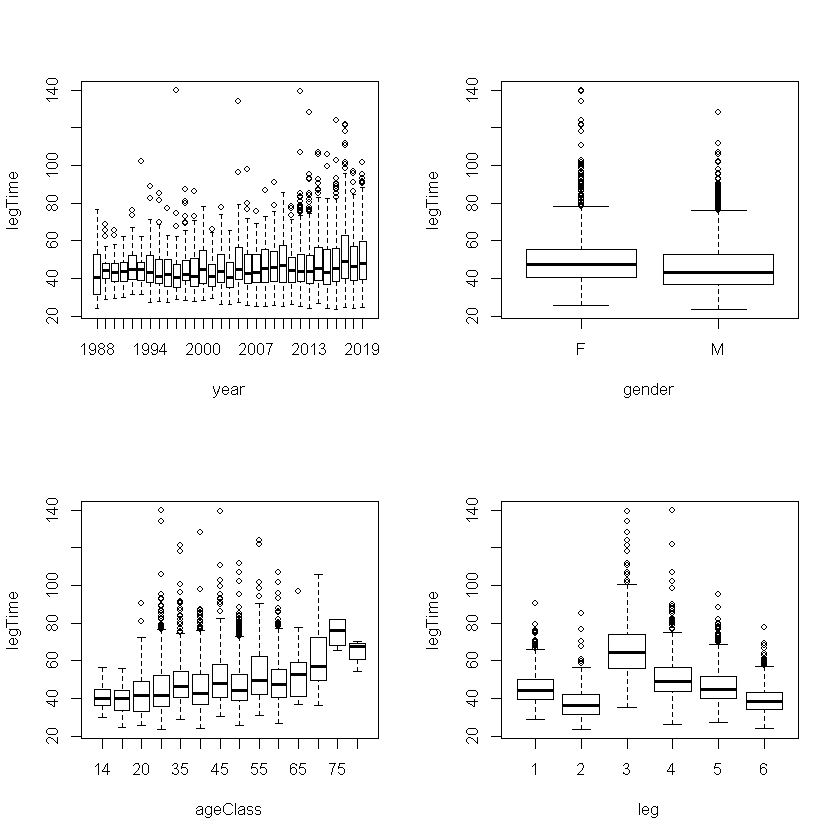

In [24]:
# create comparitive boxplots of factors
par(mfrow=c(2,2))

boxplot(legTime ~ year)
boxplot(legTime ~ gender)
boxplot(legTime ~ ageClass)
boxplot(legTime ~ leg)

##### Relationship between `legTime` and `year`

The median leg time for all of the years appear to be higher than the first year the race was run in 1998. This could be because a more diverse group of runners now run the race (women, children, older generations etc.) or another reason we don't have a variable for (weather conditions).

However the leg times haven't varied that much from the first year the race was run, with the biggest increase of about 10 mins in 2017.

The variation is not constant suggesting a transformation of the response would be suitable.

##### Relationship between `legTime` and `gender`

Both of the levels have fairly overall similar spread however there are numerous outliers on the top end of the data values in both levels of `gender`. Meaning there are a lot of high leg times seen across both genders.

The median for females is about 48 minutes and the median for males is about 43 minutes. The median for the second level (males) is lower than the first first level for this factor. Meaning that when they levels are put in this order there is a negative relationship between the response and the factor `gender`. This means that the leg times of men will be shorter than for women.

However the boxes do overlap each other meaning there will be a lot of similar leg times between men and women.

Both of the box plots appear to be right skew, so the mean will be affected by this (and the outliers) which is not great when dealing with factors.

##### Relationship between `legTime` and `ageClass`

The medians of the leg times vary between 40 to 75 minutes across the levels of the factor `ageClass`. For the age classes of 14 to 21 the medians are all similar about the 40 minute mark. These age classes contain both men and women. 

Then we can see there is a positive linear relationship when levels are in this order, as age classes increase so does leg times. It dips down for the age classes containing just men (40, 50, 60, 70 & 80) which is what we would expect as we have seen that mean on average have lower leg times. (As intuitively men run faster than women). However the times still overall increase steadily as the age class increases. The last age class (80) dips down below because it is ran by men only. 

The highest median seen is for the oldest age class of women at 75 and the second highest median is at age class 80. We see the biggest difference between men and women in these two age classes as well.

Most of the boxes overlap, predominantly up to about age class 70 meaning there will be a lot of similar data values in these levels. However the last 3 boxes also overlap meaning these 3 levels will have lots of similar data values as well.

The majority of the boxes are right skew however the last two age classes are actually left skew. This may be because the majority of these runners are choosing to walk/jog instead of run and this would be the average time for walking/jogging the leg. More investigation here would be appropriate.

There are outliers present on all levels except the age class levels 14, 16 70, 75 and 80. All of the outliers are in the higher leg times. So it appears runners in age classes 14 & 16 do not walk the track and only run it as they are younger/fitter. And possibly age classes 70, 75 & 80 prefer to walk/jog the track. However they have finished the track faster than some in the age class 21 which is impressive! Or it could be the older runners in the teams have been given the shorter legs to run perhaps.

Between the age classes 20 to 65 the overall spread of the data is fairly similar but different for the youngest classes (14 & 16) and the oldest classes (above 65) so it could be that the shorter legs are given to the youngest and eldest members of the running teams. 

The constant variance assumption may be in doubt and a transformation of the response may be needed here also.


##### Relationship between `legTime` and `leg`

All of the leg times correspond to the earlier analysis of the length of the leg with leg 2 having the shortest length and thus the shortest median leg time and leg 3 having the longest leg length and having the longest leg time. The medians range from about 48 mins to 65 mins.

All of the legs apart from leg 3 have similar spread. With leg 3 having the biggest variation. However we did notice earlier that leg 3 was the only leg length to have varied over time so this could be a contributing factor to the additional variance seen here.

There is a little overlap between the boxes so quite a few of the data values will be similar between some of the levels of the factor `leg` but the majority of highest leg times will be seen in leg 3. There are outliers present on all of the leg levels in the highest leg time values. 

All of the levels of leg appear to be slightly right skewed meaning the mean will be affected being pulled upwards which is worth noting when dealing with factors as they use the mean response of the levels.

There is no relationship between `leg` levels and `legTime` when put in this order.

#### Suggested transformations of response and/or covariates

First I will fit the model with just the covariates to the model to see what it looks like

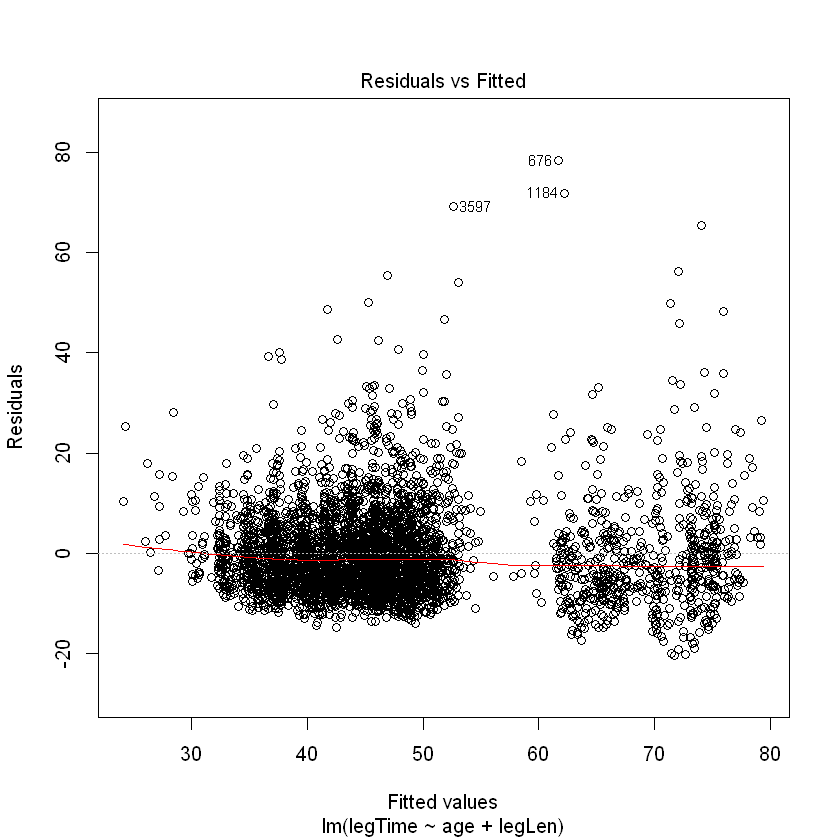

In [25]:
# Fit the model with just the covariates
LegTimeMLRFitNoFactor <- lm(legTime ~ age + legLen)

# Produce the residual plot
plot(LegTimeMLRFitNoFactor,1)

The scatter of the points in the residual plot seems to increase with the fitted values, and so the assumption that the variance is constant is in doubt. When the model assumptions do not appear to hold, we should try to transform the response variable.

We also saw that the response is right skewed earlier, so I would suggest going down the ladder of powers when doing a transformation of the response.

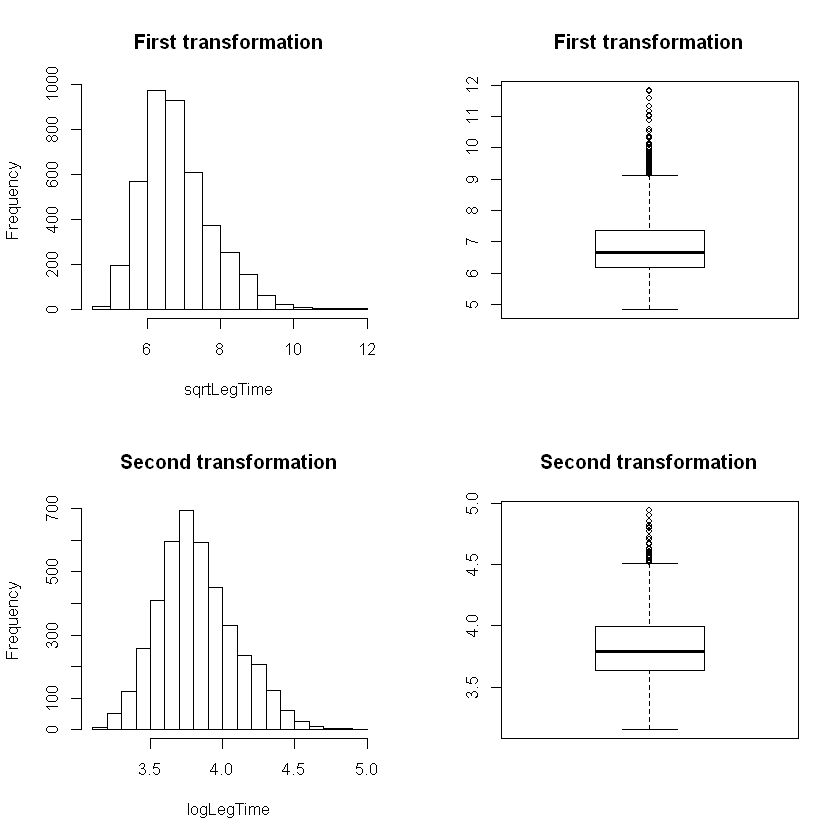

In [11]:
# square root the reponse
sqrtLegTime <- sqrt(legTime)

par (mfrow=c(2,2))

# visual summary of converted response
hist(sqrtLegTime, main = "First transformation")
boxplot(sqrtLegTime, main = "First transformation")

# log the reponse
logLegTime <- log(legTime)

# visual summary of converted response
hist(logLegTime, main="Second transformation")
boxplot(logLegTime, main= "Second transformation")

For the first transformation both the histogram and the box plot show the response is still right skewed so I'll go down the ladder of powers a second time

For the second transformation both the histogram and the box plot showed the response is still right skewed so I'll go down the ladder of powers a third time

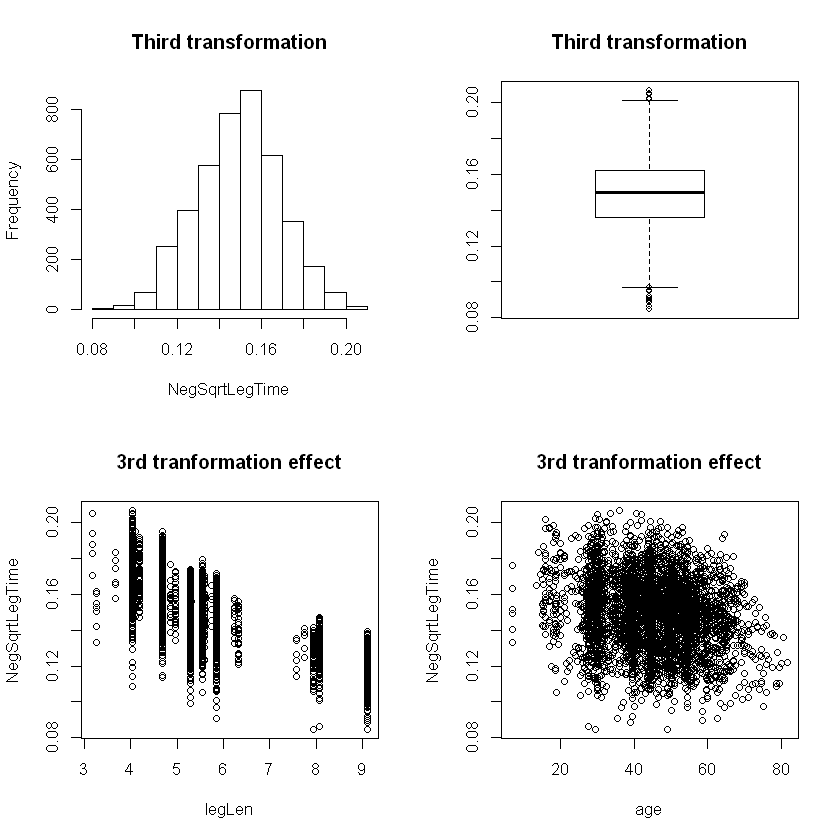

In [27]:
# x^(-1/2) the reponse
NegSqrtLegTime <- legTime^(-1/2)

par(mfrow=c(2,2))

# visual summary of converted response
hist(NegSqrtLegTime, main= "Third transformation")
boxplot(NegSqrtLegTime, main= "Third transformation")

plot(legLen,NegSqrtLegTime, main="3rd tranformation effect")
plot(age,NegSqrtLegTime, main="3rd tranformation effect")

For the third transformation both the histogram and the box plot show the response is now slightly left skewed. 

Also if we plot this response with the explanatory variables, it appears to have inverted the relationships, so I will keep the log of my response as the transformation as this third transformation appears to have gone too far.

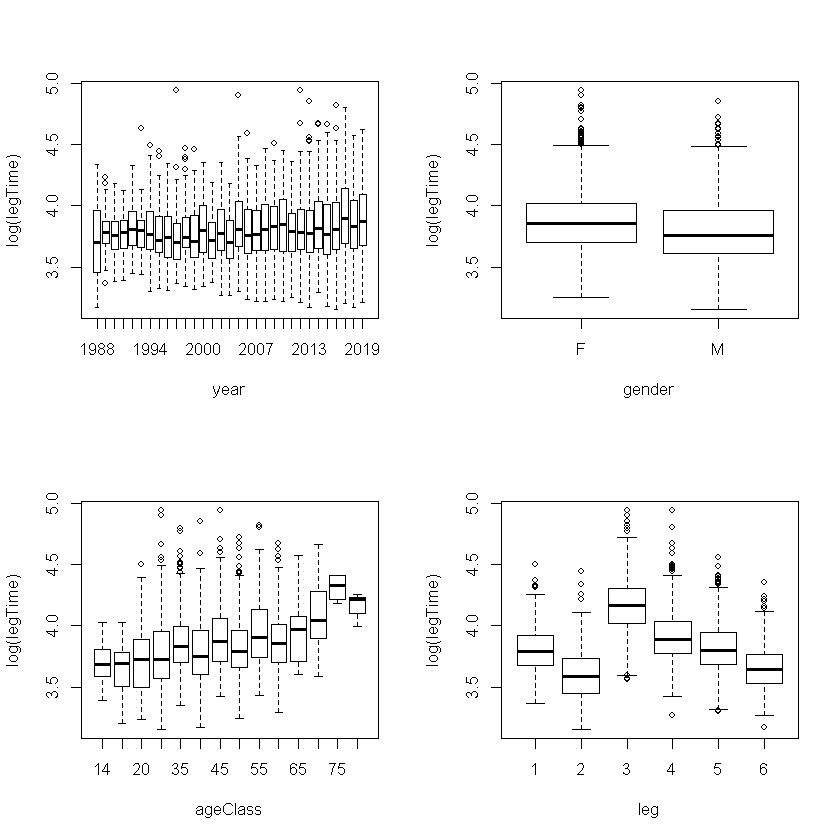

In [28]:
# create comparitive boxplots of factors
par(mfrow=c(2,2))

boxplot(log(legTime) ~ year)
boxplot(log(legTime) ~ gender)
boxplot(log(legTime) ~ ageClass)
boxplot(log(legTime) ~ leg)

The log transformation of the response seems to have improved the variation with the factors

Now I will check the model with just the covariates fitted to see if the log transformation has improved the variation also

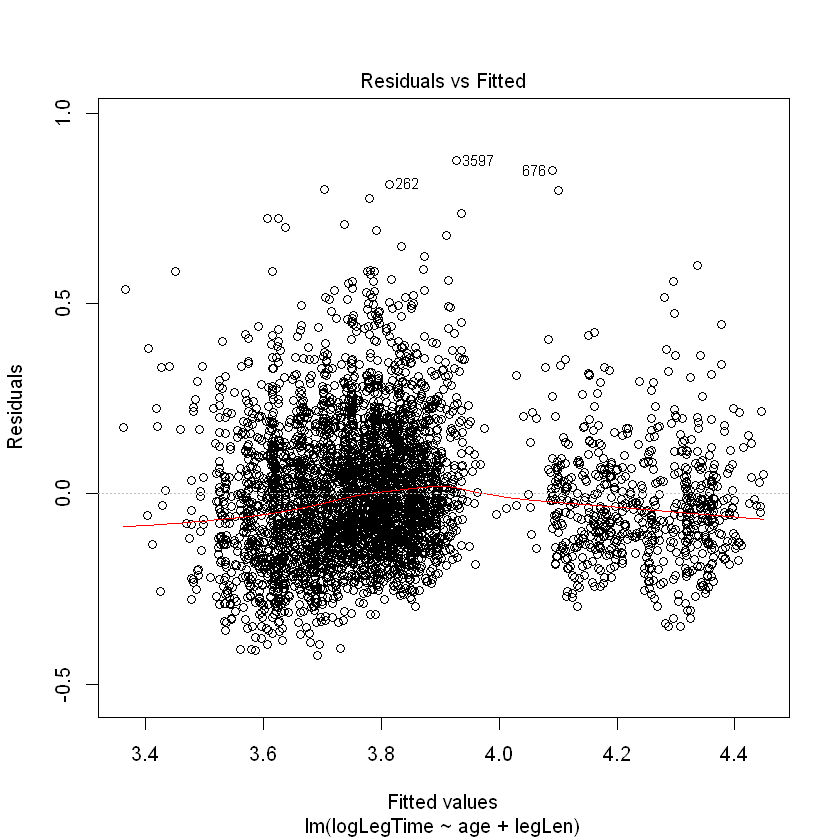

In [29]:
# Fit the model with just the covariates and transformed response
logLegTimeMLRFitNoFactor <- lm(logLegTime ~ age + legLen)

# Produce the residual plot
plot(logLegTimeMLRFitNoFactor,1)

The transformation of the response does seem to have improved the variance for the constant variance assumption. 

However there are more points scattered higher above the zero line than below so it's not great. 

Now the residual plot trend line does however show some curvature, which would suggest to me that I should consider transforming the covariates as well to improve linearity.

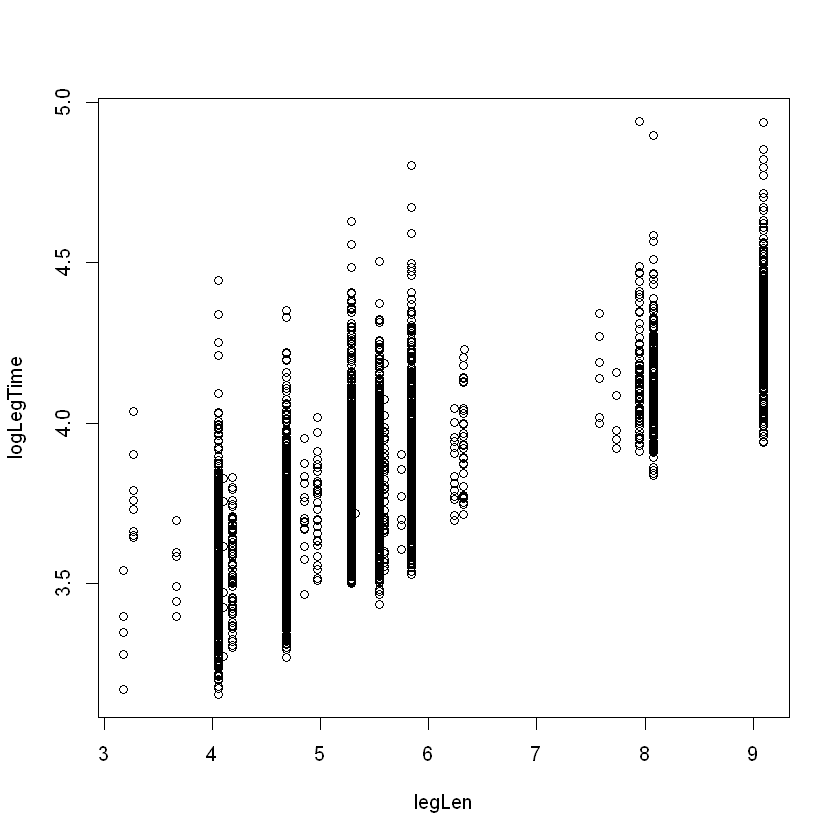

In [30]:
# plot scatterplot
plot(legLen,logLegTime)

It could be my imagination but I think there is a slight log curve to the covariate `legLen` so I will try a log transformation to the covariate to see if this straightens out the linear relationship more

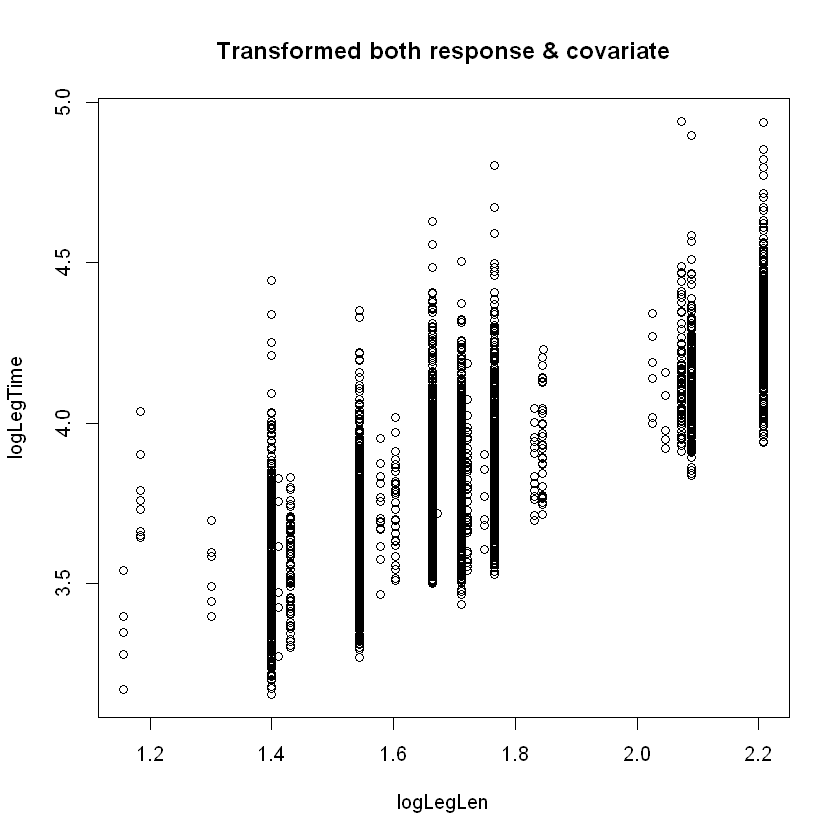

In [13]:
# transform covariate legLen
logLegLen <- log(legLen)

# plot scatterplot of both vars transformed
plot(logLegLen,logLegTime, main="Transformed both response & covariate")

I feel this transformation of the covariate `legLen` has enhanced the linearity suitably so I would consider keeping this transformation of the covariate. But I will check with the residuals plot

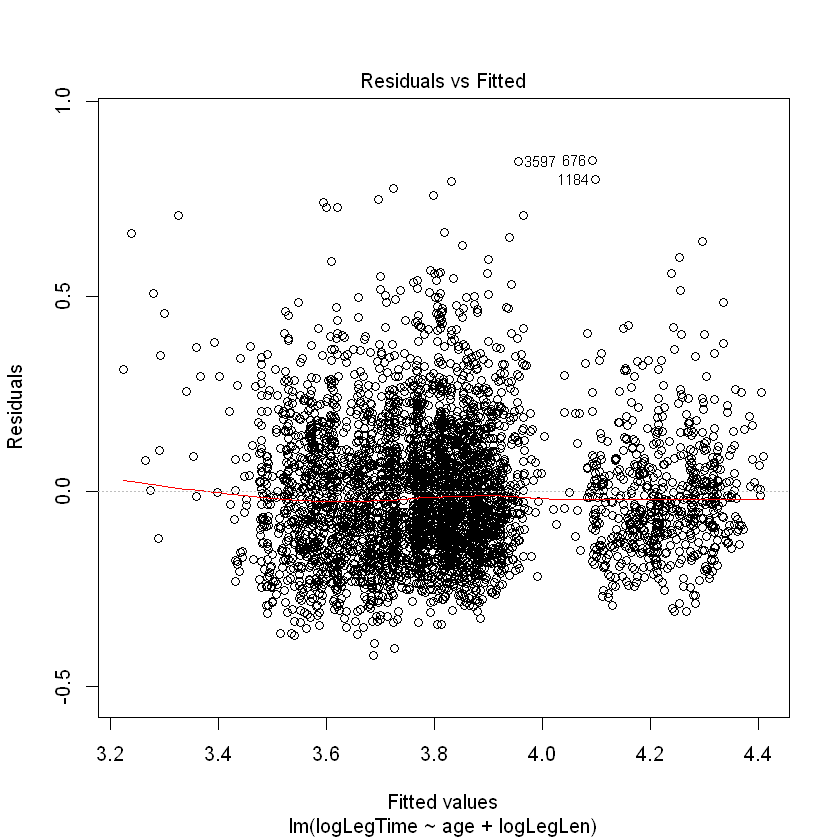

In [32]:
# Fit the model with transformed covariate legLen and transformed response
logLegTimeMLRFitNoFactorLogLen <- lm(logLegTime ~ age + logLegLen)

# Produce the residual plot
plot(logLegTimeMLRFitNoFactorLogLen,1)

Its now improved but I will still take a look at the other covariate `age` to see if linearity can be enhanced further between this covariate and the response.

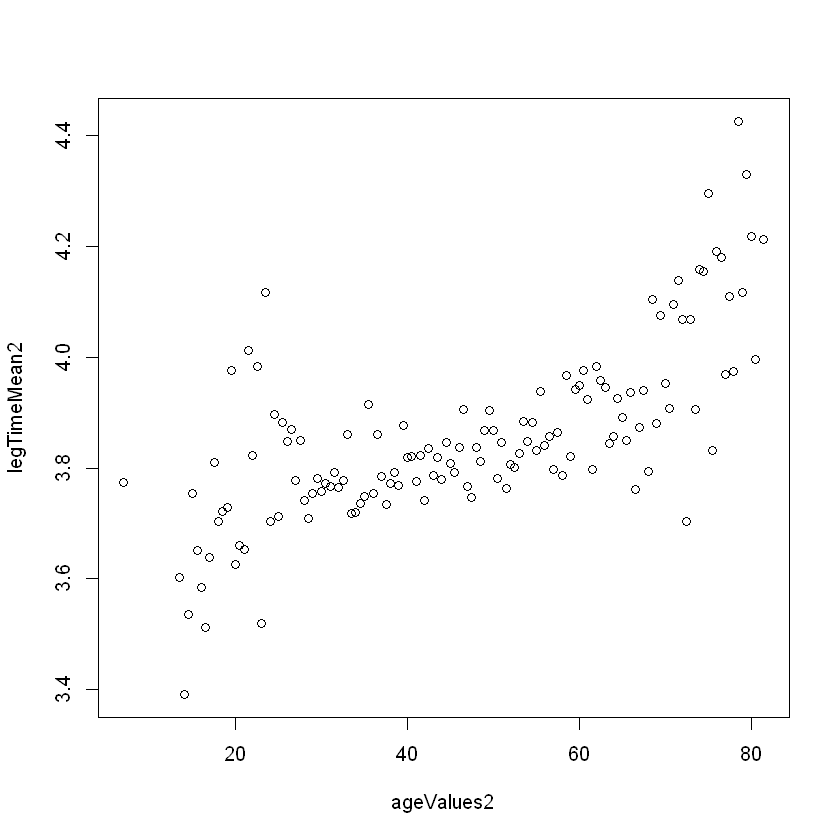

In [33]:
# plot mean of transformed response against age
legTimeAggregate2 <- aggregate(log(legTime), list(age), mean)
ageValues2 <- legTimeAggregate2[,1]
legTimeMean2 <- legTimeAggregate2[,2]
plot(ageValues2, legTimeMean2)

Again it could be my imagination but the graph looks to be a little quadratic so I will transform the covariate `age` by squaring it to see if this improves linearity.

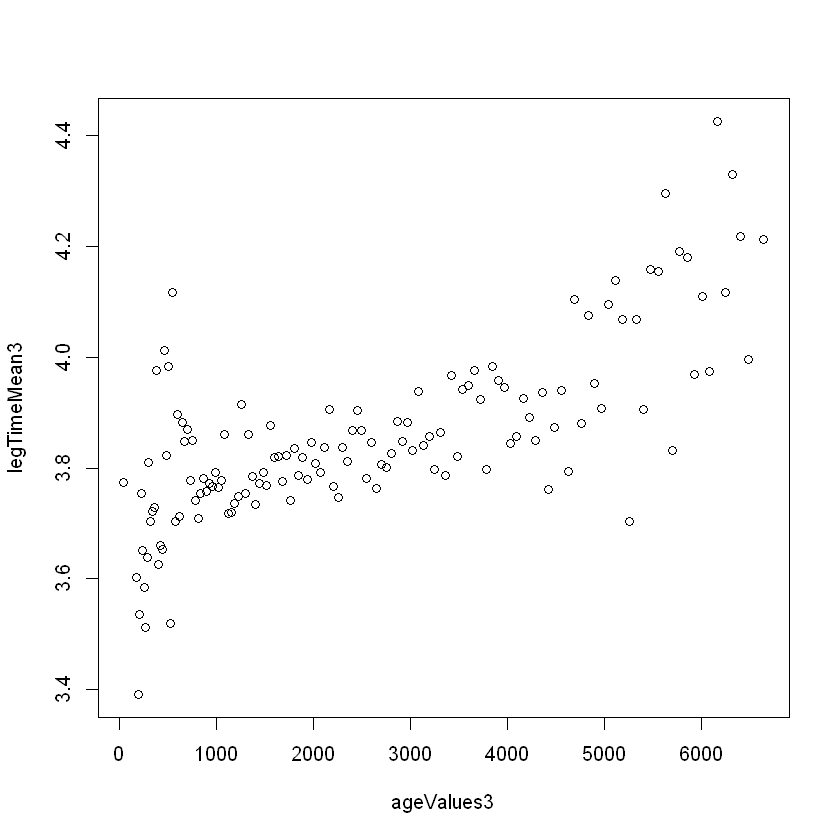

In [34]:
# plot mean of response against age squared
legTimeAggregate3 <- aggregate(log(legTime), list(age^2), mean)
ageValues3 <- legTimeAggregate3[,1]
legTimeMean3 <- legTimeAggregate3[,2]
plot(ageValues3, legTimeMean3)b

This doesn't appear to have improved linearity between the response and the covariate `age`, but I will check with the residual plot for the transformed response and both the transformed covariates.

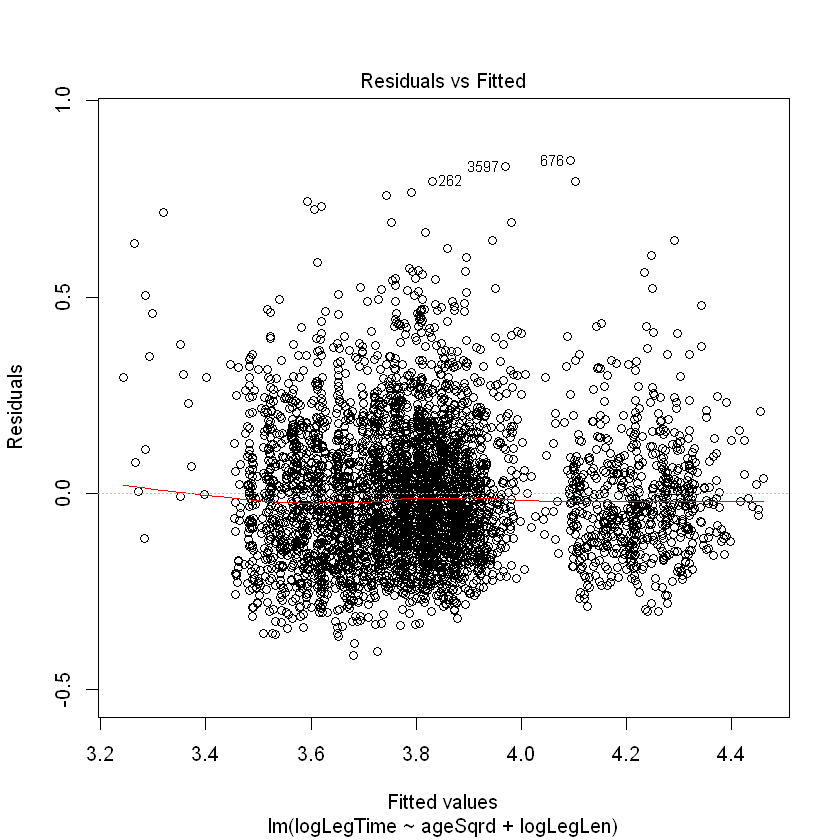

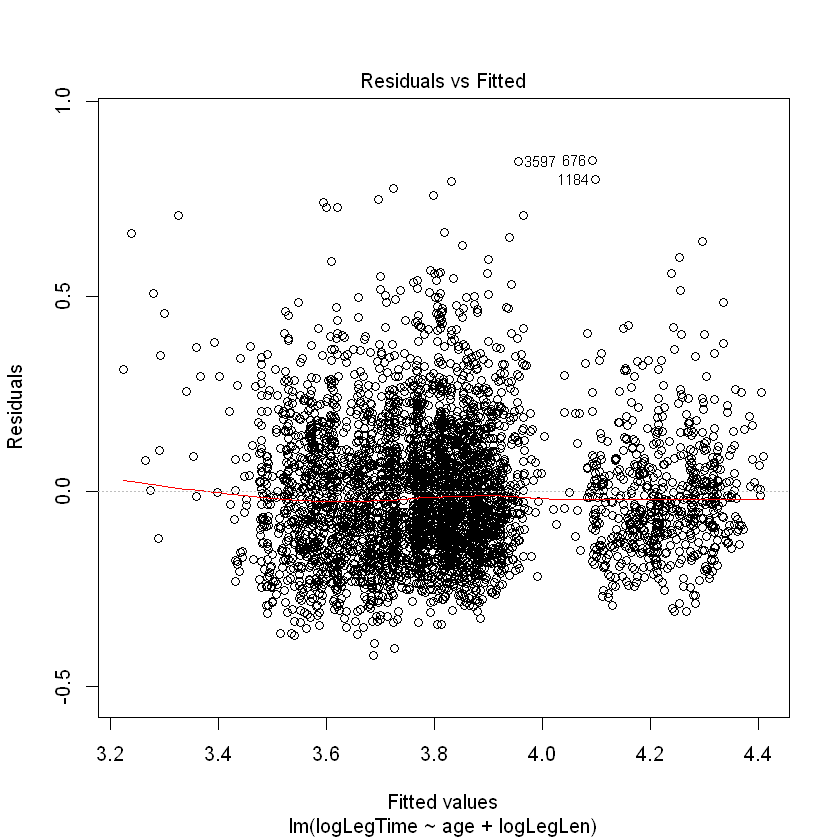

In [36]:
# transfrom cov age
ageSqrd <- age^2

# Fit the model with transformed covariates and transformed response
logLegTimeMLRFitNoFactorLogLenAgeSqrd <- lm(logLegTime ~ ageSqrd + logLegLen)

# Produce the new residual plot
plot(logLegTimeMLRFitNoFactorLogLenAgeSqrd,1)

# Produce the original residual plot
plot(logLegTimeMLRFitNoFactorLogLen,1)

The residual plot trend lines both look the same to me in both plots so I will not keep the transformation of the covariate `age`